# Excercise 2: Wiener Filter

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, IntSlider, FloatSlider
from IPython.display import display
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['figure.subplot.hspace'] = 0.4

## 2.1.d: Obtain all correllations

In [2]:
akf_alpha = np.asarray([1, 0.5, 0.85])
akf_alpha

array([ 1.  ,  0.5 ,  0.85])

In [3]:
def get_index_matrix(D):
    indices = np.arange(0, D)
    index_matrix = indices[None, :] - indices[:, None]
    return np.abs(index_matrix)

# print(get_index_matrix(2))
# print(get_index_matrix(3))
# print(get_index_matrix(4))

In [4]:
correlation_matrix_alpha = akf_alpha[get_index_matrix(3)]
correlation_matrix_alpha

array([[ 1.  ,  0.5 ,  0.85],
       [ 0.5 ,  1.  ,  0.5 ],
       [ 0.85,  0.5 ,  1.  ]])

In [5]:
noise_variance = np.asarray(0.1)
correlation_matrix_noise = noise_variance * np.eye(3)
correlation_matrix_noise

array([[ 0.1,  0. ,  0. ],
       [ 0. ,  0.1,  0. ],
       [ 0. ,  0. ,  0.1]])

In [6]:
crosscorrelation_vector = np.asarray(
    [
        [np.sqrt(0.27)],
        [0],
        [0]
    ]
)
crosscorrelation_vector

array([[ 0.51961524],
       [ 0.        ],
       [ 0.        ]])

## 2.1.d: Optimal filter coefficients

### Noisy

In [7]:
correlation_matrix_inverse = np.linalg.inv(correlation_matrix_alpha + correlation_matrix_noise)

In [8]:
optimal_coefficients = correlation_matrix_inverse @ crosscorrelation_vector
optimal_coefficients

array([[ 1.21296202],
       [-0.15793776],
       [-0.86549894]])

### Clean

In [9]:
correlation_matrix_inverse = np.linalg.inv(correlation_matrix_alpha)

In [10]:
optimal_coefficients = correlation_matrix_inverse @ crosscorrelation_vector
optimal_coefficients

array([[ 1.9245009 ],
       [-0.19245009],
       [-1.53960072]])

## 2.1.e: Mean squared error

### Noisy

In [11]:
correlation_matrix_inverse = np.linalg.inv(correlation_matrix_alpha + correlation_matrix_noise)

In [12]:
input_variance = 1
mse = input_variance - crosscorrelation_vector.conj().T @ correlation_matrix_inverse @ crosscorrelation_vector
mse

array([[ 0.36972644]])

### Clean

In [13]:
correlation_matrix_inverse = np.linalg.inv(correlation_matrix_alpha)

In [14]:
input_variance = 1
mse = input_variance - crosscorrelation_vector.conj().T @ correlation_matrix_inverse @ crosscorrelation_vector
mse

array([[ 0.]])

## 2.1.e: More coefficients

In [15]:
akf_alpha = np.asarray([1, 0.5, 0.85, 0.485])
akf_alpha

array([ 1.   ,  0.5  ,  0.85 ,  0.485])

In [16]:
correlation_matrix_alpha = akf_alpha[get_index_matrix(4)]
correlation_matrix_alpha

array([[ 1.   ,  0.5  ,  0.85 ,  0.485],
       [ 0.5  ,  1.   ,  0.5  ,  0.85 ],
       [ 0.85 ,  0.5  ,  1.   ,  0.5  ],
       [ 0.485,  0.85 ,  0.5  ,  1.   ]])

In [17]:
noise_variance = np.asarray(0.1)
correlation_matrix_noise = noise_variance * np.eye(4)
correlation_matrix_noise

array([[ 0.1,  0. ,  0. ,  0. ],
       [ 0. ,  0.1,  0. ,  0. ],
       [ 0. ,  0. ,  0.1,  0. ],
       [ 0. ,  0. ,  0. ,  0.1]])

In [18]:
crosscorrelation_vector = np.asarray(
    [
        [np.sqrt(0.27)],
        [0],
        [0],
        [0]
    ]
)
crosscorrelation_vector

array([[ 0.51961524],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

### Noisy

In [19]:
correlation_matrix_inverse = np.linalg.inv(correlation_matrix_alpha + correlation_matrix_noise)

In [20]:
optimal_coefficients = correlation_matrix_inverse @ crosscorrelation_vector
optimal_coefficients

array([[ 1.21500172],
       [-0.12268194],
       [-0.86047234],
       [-0.04978183]])

In [21]:
input_variance = 1
mse = input_variance - crosscorrelation_vector.conj().T @ correlation_matrix_inverse @ crosscorrelation_vector
mse

array([[ 0.36866659]])

### Clean

In [22]:
correlation_matrix_inverse = np.linalg.inv(correlation_matrix_alpha)

In [23]:
optimal_coefficients = correlation_matrix_inverse @ crosscorrelation_vector
optimal_coefficients

array([[  1.92450090e+00],
       [ -1.92450090e-01],
       [ -1.53960072e+00],
       [ -1.28197512e-17]])

In [24]:
input_variance = 1
mse = input_variance - crosscorrelation_vector.conj().T @ correlation_matrix_inverse @ crosscorrelation_vector
mse

array([[ 0.]])

## 2.1.f: Error plane

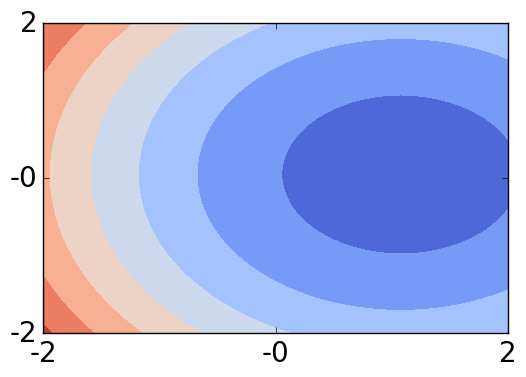

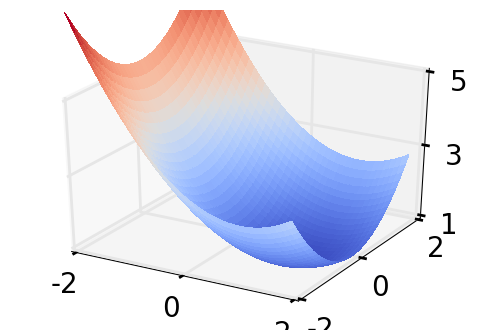

In [25]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca()
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = input_variance \
    - 2 * (xx * crosscorrelation_vector[0] + yy * crosscorrelation_vector[1]) \
    + (xx**2 + yy**2) * crosscorrelation_vector[0] \
    + 2 * xx * yy * crosscorrelation_vector[1]
h = plt.contourf(x, y, z, cmap=cm.coolwarm)

ax.xaxis.set_major_locator(LinearLocator(3))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.00f'))
ax.yaxis.set_major_locator(LinearLocator(3))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.00f'))

plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(1, 5)

ax.xaxis.set_major_locator(LinearLocator(3))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.00f'))
ax.yaxis.set_major_locator(LinearLocator(3))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.00f'))
ax.zaxis.set_major_locator(LinearLocator(3))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.00f'))


plt.show()